In [1]:
# Load & inspect
# Load titanic.csv into df.
# Inspect head, tail, info(), and describe().

# Basic cleaning
# Handle missing Age values (e.g., fill with median age).
# Handle missing Embarked values (e.g., fill with most frequent value).

# Feature engineering
# Create a new column FamilySize = SibSp + Parch + 1.
# Create a new column IsAlone (1 if FamilySize == 1, else 0).

# Core questions
# Answer and compute using pandas (store results in variables or small DataFrames):
# Survival rate by sex.
# Survival rate by passenger class (Pclass).
# Survival rate by Embarked port.
# Compare average age of survivors vs non-survivors.
# Compare survival rate of IsAlone == 1 vs IsAlone == 0.

# (If time) Simple visualization or tabular summary
# Tabular: create one summary DataFrame that contains survival rate by sex and class.
# Optional plots if allowed.


In [66]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv", encoding = 'ISO-8859-1')


In [4]:
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  20 non-null     int64  
 1   Survived     20 non-null     int64  
 2   Pclass       20 non-null     int64  
 3   Name         20 non-null     object 
 4   Sex          20 non-null     object 
 5   Age          18 non-null     float64
 6   SibSp        20 non-null     int64  
 7   Parch        20 non-null     int64  
 8   Fare         20 non-null     float64
 9   Embarked     19 non-null     object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,20.00000,20.000000,20.000000,18.000000,20.00000,20.000000,20.00000
mean,10.50000,0.400000,2.300000,29.111111,0.35000,0.150000,27.72100
std,5.91608,0.502625,0.864505,11.786777,0.48936,0.366348,32.05014
min,1.00000,0.000000,1.000000,2.000000,0.00000,0.000000,7.23000
25%,5.75000,0.000000,1.750000,21.250000,0.00000,0.000000,7.89000
50%,10.50000,0.000000,3.000000,29.000000,0.00000,0.000000,12.67500
75%,15.25000,1.000000,3.000000,35.000000,1.00000,0.000000,32.46500
max,20.00000,1.000000,3.000000,54.000000,1.00000,1.000000,120.00000


In [7]:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [8]:
df['Embarked'].fillna(df['Embarked'].mode(), inplace = True)

In [ ]:
# Feature engineering
# Create a new column FamilySize = SibSp + Parch + 1.
# Create a new column IsAlone (1 if FamilySize == 1, else 0).

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch'] +1

In [13]:
df['FamilySize']

0     2
1     2
2     1
3     3
4     1
5     3
6     1
7     1
8     1
9     1
10    2
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    2
19    3
Name: FamilySize, dtype: int64

In [14]:
df['IsAlone'] = (df['FamilySize']==1).astype(int)

In [15]:
df['IsAlone']

0     0
1     0
2     1
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    0
Name: IsAlone, dtype: int64

In [ ]:
# Core questions
# Answer and compute using pandas (store results in variables or small DataFrames):
# Survival rate by sex.
# Survival rate by passenger class (Pclass).
# Survival rate by Embarked port.
# Compare average age of survivors vs non-survivors.
# Compare survival rate of IsAlone == 1 vs IsAlone == 0.

In [22]:
surviedBy = df.groupby('Sex')['Survived'].sum()

In [23]:
surviedBy

Sex
female    7
male      1
Name: Survived, dtype: int64

In [24]:
surviedByPclass = df.groupby('Pclass')['Survived'].sum()

In [25]:
surviedByPclass

Pclass
1    4
2    2
3    2
Name: Survived, dtype: int64

In [27]:
surviedByEmbarked = df.groupby('Embarked')['Survived'].sum()

In [28]:
surviedByEmbarked

Embarked
C    2
Q    1
S    4
Name: Survived, dtype: int64

In [ ]:
# Compare average age of survivors vs non-survivors.
# Compare survival rate of IsAlone == 1 vs IsAlone == 0.

In [33]:
avgAgeSurvivors = df.groupby('Survived')['Age'].mean()

In [34]:
avgAgeSurvivors

Survived
0    29.00
1    29.25
Name: Age, dtype: float64

In [37]:
avgSurvivalRate = df.groupby('IsAlone')['Survived'].mean()

In [38]:
avgSurvivalRate = df.groupby('IsAlone')['Survived'].mean()



In [ ]:
# (If time) Simple visualization or tabular summary
# Tabular: create one summary DataFrame that contains survival rate by sex and class.
# Optional plots if allowed.

In [64]:
new = df.groupby(['Sex','Pclass'])['Survived'].mean().reset_index()

<Axes: xlabel='Pclass', ylabel='Sex'>

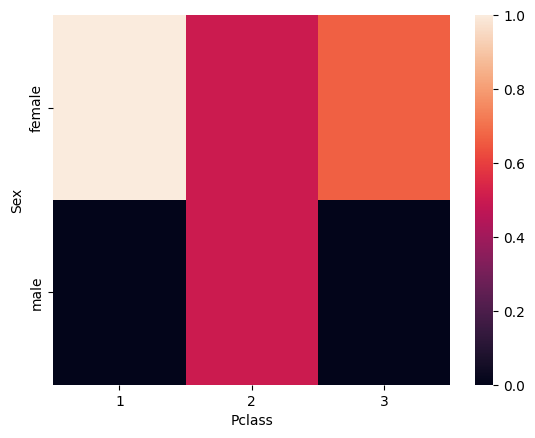

In [68]:
df_sns = new.pivot(index='Sex', columns='Pclass', values='Survived')
sns.heatmap(df_sns, )